<head>
    <link rel="stylesheet" href="styles.css">
</head>
<div align="center">
        <!-- Encabezado -->
        <p class="titulo">Universidad de Oriente</p>
        <p class="subtitulo">Núcleo de Anzoátegui</p>
        <p class="subtitulo">Escuela de Ingeniería</p>
        <p class="subtitulo">Departamento de Computación y Sistemas</p>
        <p class="subtitulo">Taller de Análisis y Diseño de Algoritmos</p>
        <p class="subtitulo">Sección: 01</p>
        <!-- Logotipo -->
        <img src="UDO.png" alt="Logo Universidad de Oriente" class="logo">
        <!--Titulo-->
        <h1 class="titulo-principal">Heap sort VS Selection sort
        </h1>
        <!--Autores-->
        <p class="subtitulo">Autor:</p>
        <p class="subtitulo">Jesús Alcalá | C.I: 31.205.548</p>
    </div>

<div align="center" style="font-size:84px;">
Introducción
</div>

Se realizo un análisis comparativo entre dos algoritmos clásicos de ordenamiento: **Heap Sort** y **Selection Sort**, con el objetivo de evaluar su rendimiento en términos de **tiempo de ejecución** y **número de operaciones realizadas** sobre arreglos de gran tamaño.

El experimento se realizó utilizando arreglos generados previamente con la biblioteca `numpy`, almacenados en archivos `.npy` con tamaños fijos de 20,000 a 200,000 elementos. Los datos fueron cargados y procesados en entornos controlados, midiendo el desempeño mediante con las siguientes métricas:

- Tiempo total de ejecución (en segundos)
- Número de llamadas o comparaciones realizadas


Los algoritmos implementados fueron:

1. **Heap Sort**: Un método eficiente basado en el concepto de *max-heap*, con una complejidad temporal promedio de **O(n log n)**.
2. **Selection Sort (versión estándar)**: Un algoritmo sencillo pero ineficiente para grandes conjuntos de datos, con una complejidad de **O(n²)**.
3. **Selection Sort (con NumPy)**: Una versión optimizada que aprovecha las ventajas de `numpy` para mejorar el rendimiento frente a la implementación nativa en Python.

Para cada algoritmo se realizaron múltiples ejecuciones sobre los mismos conjuntos de datos, permitiendo obtener resultados promediados y estadísticamente representativos. Además, se utilizó la biblioteca `pandas` para el análisis posterior y la visualización de resultados, facilitando la interpretación del comportamiento de cada algoritmo bajo diferentes condiciones.

Este análisis busca no solo mostrar diferencias de rendimiento, sino también ilustrar cómo factores como la estructura de datos, la implementación y el lenguaje afectan el desempeño real de los algoritmos, más allá de su complejidad teórica.


<div align="center" style="font-size:84px;">
Diagrama de clases
</div>

### 1. **Clase Base: `Algorithm`**
La clase `Algorithm` es la clase principal que actúa como **clase padre** para ambos algoritmos (`HeapSort` y `SelectionSort`). Proporciona funcionalidades comunes que pueden ser heredadas por las subclases.

#### Atributos:
- **`arr : list = None`**: Un atributo que almacena el arreglo a ordenar. Inicialmente se establece como `None`, ya que no tiene un valor predeterminado inicial.

#### Métodos:
- **`save_result_csv(result: dict, file_name: str = "resultados.csv")`**: Método para guardar los resultados de la ejecución en un archivo CSV. Recibe un diccionario `result` con los datos a guardar y un nombre de archivo opcional (el cual es el archivo objetivo para guardar los datos).

- **`load_array_from_file(file_name: str)`**: Método para cargar un arreglo desde un archivo. Esto permite leer arreglos previamente generados (por ejemplo, archivos `.npy`) y trabajar con ellos.

---

### 2. **Clase `HeapSort`**
La clase `HeapSort` hereda de `Algorithm` y agrega funcionalidades específicas para implementar el **Heap Sort**.

#### Atributos:
- **`calls: int = 0`**: Un contador que lleva registro del número de llamadas realizadas durante el proceso de ordenamiento. Esto es útil para medir el rendimiento del algoritmo.

#### Métodos:
- **`heapify(list_length: int, index)`**: Método que construye o restaura la propiedad del heap en un subárbol. Es fundamental para mantener la estructura del montículo (heap).


- **`heap_sort()`**: Implementación del algoritmo Heap Sort. Este método utiliza `heapify` para organizar el arreglo en un max-heap y luego extraer elementos uno por uno.


- **`sort(arr: str | list, id: int)`**: Método principal que carga el arreglo (ya sea desde un archivo o directamente como lista), llama a `heap_sort()`, mide el tiempo de ejecución y guarda los resultados en un archivo CSV.

---

### 3. **Clase `Selection`**
La clase `Selection` también hereda de `Algorithm` y agrega funcionalidades específicas para implementar el **Selection Sort**.

#### Atributos:
- **`calls: int = 0`**: Similar a `HeapSort`, este contador lleva registro del número de operaciones realizadas durante el ordenamiento.

#### Métodos:
- **`selection_sort()`**: Implementación del algoritmo Selection Sort. Busca el elemento mínimo en cada iteración y lo coloca en su posición correcta.


- **`sort(arr: str | list, id: int)`**: Método principal similar al de `HeapSort`. Carga el arreglo, llama a `selection_sort()`, mide el tiempo de ejecución y guarda los resultados en un archivo CSV.

---

## Relación entre las clases

El diagrama muestra claramente cómo ambas clases (`HeapSort` y `Selection`) heredan de `Algorithm`. Esto significa que:

1. **Reutilización de código**: Ambas clases comparten métodos como `save_result_csv` y `load_array_from_file`, lo que evita duplicar lógica común.


2. **Extensibilidad**: Si se necesita agregar más algoritmos en el futuro, se puede hacer fácilmente creando nuevas subclases de `Algorithm`.


3. **Encapsulamiento**: Los detalles específicos de cada algoritmo (como `heapify` y `selection_sort`) están encapsulados dentro de sus respectivas clases.

<div align="center">
Procedimiento
</div>

Una vez creados los algoritmos en `heap_sort.py`, `selection.py` y `selection_with_np.py` los resultados fueron guardados en archivos .csv y ahora serán analizados con pandas.

**Paso 1:** Se importan las librerias necesarias

In [51]:
import pandas as pd # Para el análisis y manejo de los datos
import matplotlib.pyplot as plt # Para gráficar los resultados de la practica
import seaborn as sns # Para simplificar el gráfico de los resultados

**Paso 2:** Se importan los archivos csv para ser manipulados como dataframes

In [28]:
# Rutas de los archivos
heap_file = 'resultados_heap_sort.csv'
selection_normal_file = 'resultados_selection_sort_normal.csv'
selection_numpy_file = 'resultados_selection_sort_numpy.csv'

# Cargar datos
df_heap = pd.read_csv(heap_file)
df_sel_normal = pd.read_csv(selection_normal_file)
df_sel_numpy = pd.read_csv(selection_numpy_file)

# Añadir columna de tipo de algoritmo para identificarlos después
df_heap['algoritmo'] = 'Heap Sort'
df_sel_normal['algoritmo'] = 'Selection Sort (Python)'
df_sel_numpy['algoritmo'] = 'Selection Sort (NumPy)'

# Mostrar primeras filas de cada dataframe
print("Heap Sort:")
display(df_heap.head())
print("\nSelection Sort (Normal):")
display(df_sel_normal.head())
print("\nSelection Sort (NumPy):")
display(df_sel_numpy.head())

Heap Sort:


,Arreglo_ordenado,tamano_arreglo,tiempo_segundos,llamadas_heapify,fecha_hora,algoritmo
0,1,200000,2.404821,3150210,2025-06-10 00:00:17,Heap Sort
1,2,200000,2.438184,3150179,2025-06-10 00:00:19,Heap Sort
2,3,200000,2.465533,3149708,2025-06-10 00:00:22,Heap Sort
3,4,200000,2.423324,3149717,2025-06-10 00:00:24,Heap Sort
4,5,200000,2.432561,3150146,2025-06-10 00:00:27,Heap Sort



Selection Sort (Normal):


,Arreglo_ordenado,tamano_arreglo,tiempo_segundos,comparaciones,intercambios,fecha_hora,algoritmo
0,1,20000,45.541664,199990000,19996,2025-06-10 01:57:10,Selection Sort (Python)
1,2,20000,45.546052,199990000,19991,2025-06-10 01:57:55,Selection Sort (Python)
2,3,20000,46.544639,199990000,19986,2025-06-10 01:58:42,Selection Sort (Python)
3,4,20000,47.785817,199990000,19992,2025-06-10 01:59:30,Selection Sort (Python)
4,5,20000,50.299738,199990000,19990,2025-06-10 02:00:20,Selection Sort (Python)



Selection Sort (NumPy):


,Arreglo_ordenado,tamano_arreglo,tiempo_segundos,comparaciones,intercambios,fecha_hora,algoritmo
0,1,20000,29.287947,199990000,19996,2025-06-10 02:19:56,Selection Sort (NumPy)
1,2,20000,29.925528,199990000,19991,2025-06-10 02:20:26,Selection Sort (NumPy)
2,3,20000,30.582852,199990000,19986,2025-06-10 02:20:57,Selection Sort (NumPy)
3,4,20000,30.933485,199990000,19992,2025-06-10 02:21:28,Selection Sort (NumPy)
4,5,20000,28.952910,199990000,19990,2025-06-10 02:21:56,Selection Sort (NumPy)


**Paso 3:** Se eliminan las columnas innecesarias para este análisis y se agrupan datos para facilitar el procedimiento

In [29]:
# Se elimina la fecha y la hora para poder hacer la comparación
df_heap.drop(columns=['fecha_hora'], inplace=True)
df_sel_normal.drop(columns=['fecha_hora'], inplace=True)
df_sel_numpy.drop(columns=['fecha_hora'], inplace=True)

# Se combinan las columnas de operaciones
# Renombrar columnas para unificar
df_heap.rename(columns={'llamadas_heapify': 'operaciones'}, inplace=True)
df_sel_normal.rename(columns={'comparaciones': 'operaciones'}, inplace=True)
df_sel_numpy.rename(columns={'comparaciones': 'operaciones'}, inplace=True)

In [31]:
# Se promedian las 3 iteraciones realizadas para ser graficadas
cols_averge = ["tamano_arreglo", "tiempo_segundos", "operaciones"]
df_heap_promd = df_heap.groupby(['Arreglo_ordenado', 'algoritmo'])[cols_averge].mean().reset_index()

cols_averge_selection = ["tamano_arreglo","tiempo_segundos","operaciones","intercambios"]
df_sel_normal_promd = df_sel_normal.groupby(['Arreglo_ordenado', 'algoritmo'])[cols_averge_selection].mean().reset_index()

df_sel_numpy_promd = df_sel_numpy.groupby(['Arreglo_ordenado', 'algoritmo'])[cols_averge_selection].mean().reset_index()


In [32]:
# Ahora se combinan los dataframes para poder graficarlos
df_combined = pd.concat([df_heap_promd, df_sel_normal_promd, df_sel_numpy_promd], axis=0, ignore_index=True)
df_combined

,Arreglo_ordenado,algoritmo,tamano_arreglo,tiempo_segundos,operaciones,intercambios
0,1,Heap Sort,200000.0,2.434292,3150210.0,NaN
1,2,Heap Sort,200000.0,2.460441,3150179.0,NaN
2,3,Heap Sort,200000.0,2.463945,3149708.0,NaN
3,4,Heap Sort,200000.0,2.462486,3149717.0,NaN
4,5,Heap Sort,200000.0,2.447785,3150146.0,NaN
5,6,Heap Sort,200000.0,2.443604,3149773.0,NaN
6,7,Heap Sort,200000.0,2.447190,3150177.0,NaN
7,8,Heap Sort,200000.0,2.444804,3149225.0,NaN
8,9,Heap Sort,200000.0,2.426918,3149996.0,NaN
9,10,Heap Sort,200000.0,2.449238,3149708.0,NaN


**Paso 4:** Se empiezan a generar los primeros 3 gráficos con los datos del heap_sort de 200k y el selection sort de 20k

dichos gráficos son: 
- Tiempo promedio de ejecución vs Arreglo ordenado
- Operaciones realizadas vs Arreglo ordenado
- Tamaño de arreglo ordenado por prueba

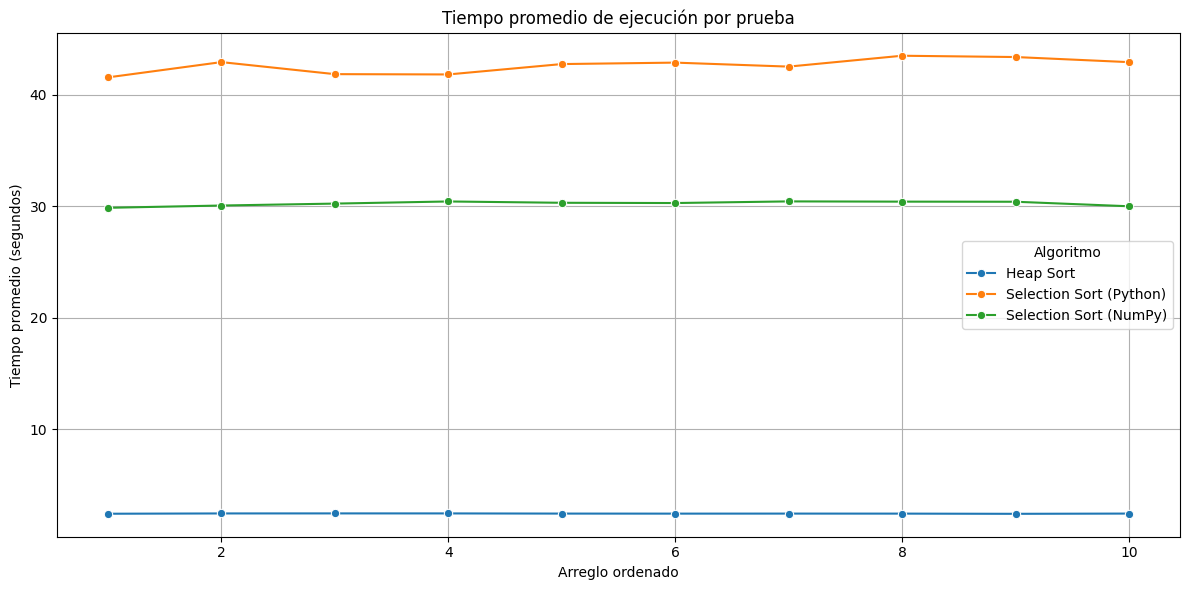

In [52]:
# Se grafican los datos por tiempo promedio de ejecución
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined, x='Arreglo_ordenado', y='tiempo_segundos', hue='algoritmo', marker='o')
plt.title('Tiempo promedio de ejecución por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Tiempo promedio (segundos)')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.tight_layout()
plt.show()

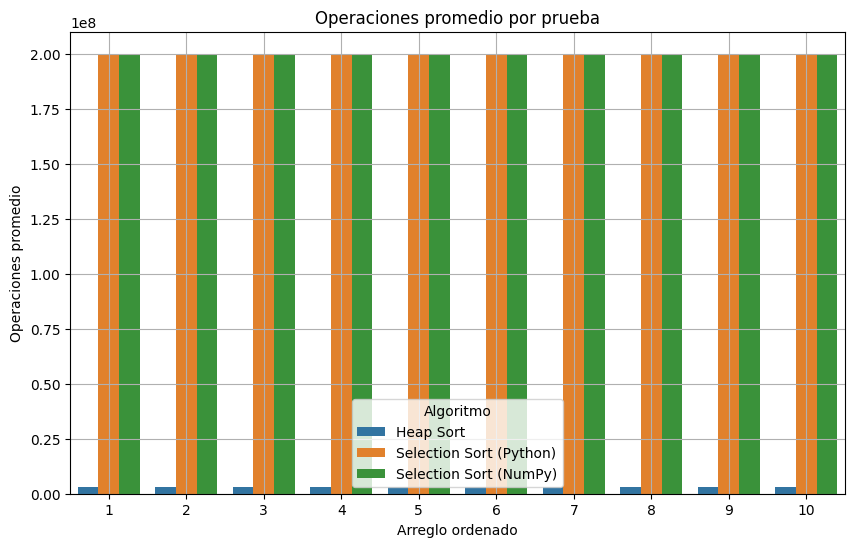

In [ ]:
# Se grafican los datos por operaciones realizadas
plt.figure(figsize=(10, 6))
sns.barplot(data=df_combined, x='Arreglo_ordenado', y='operaciones', hue='algoritmo')
plt.title('Operaciones promedio por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Operaciones promedio')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.show()

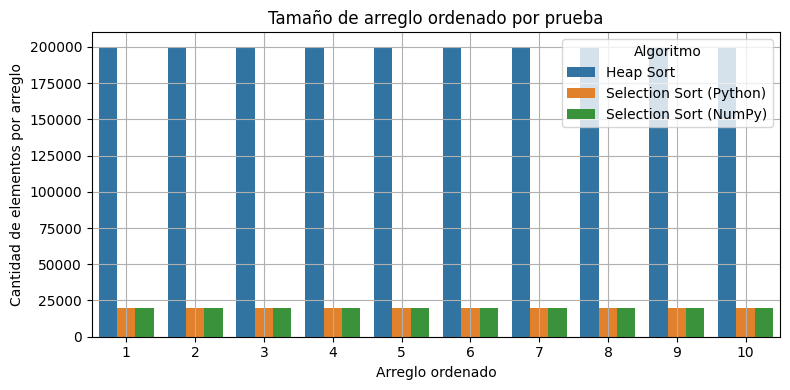

In [41]:
# Se grafican los datos por el tamaño de cada arreglo
plt.figure(figsize=(8, 4))
sns.barplot(data=df_combined, x='Arreglo_ordenado', y='tamano_arreglo', hue='algoritmo')
plt.title('Tamaño de arreglo ordenado por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Cantidad de elementos por arreglo')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.tight_layout()
plt.show()

**Paso 5:** Ahora se generaran los mismos 3 gráficos pero con los datos del heap_sort de 20k y el selection sort de 20k

dichos gráficos son: 
- Tiempo promedio de ejecución vs Arreglo ordenado
- Operaciones realizadas vs Arreglo ordenado
- Tamaño de arreglo ordenado por prueba

In [45]:
# Ahora comparemos utilizando arreglos de 20000 elementos para cada Algoritmo
df_heap_20k = pd.read_csv("resultados_heap_sort_LessData.csv")

df_heap_20k.drop(columns=['fecha_hora'], inplace=True)
df_heap_20k.rename(columns={'llamadas_heapify': 'operaciones'}, inplace=True)

df_heap_20k['algoritmo'] = 'Heap Sort'
cols_averge = ["tamano_arreglo", "tiempo_segundos", "operaciones"]

df_heap_20k_promd = df_heap_20k.groupby(['Arreglo_ordenado', 'algoritmo'])[cols_averge].mean().reset_index()
df_combined20k = pd.concat([df_heap_20k_promd,df_sel_normal_promd,df_sel_numpy_promd], axis=0, ignore_index=True)

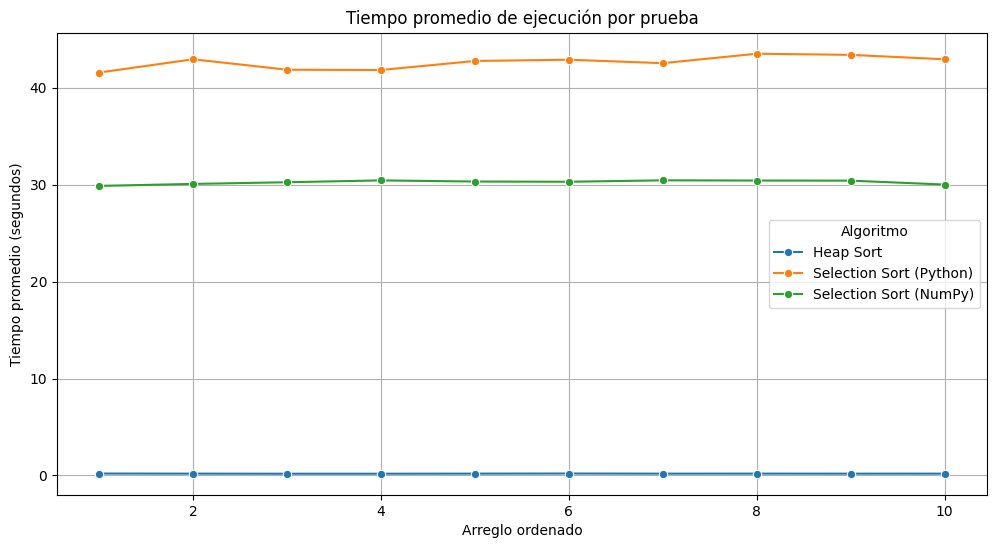

In [46]:
# Realizamos el grafico de tiempo promedio de ejecución
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_combined20k, x='Arreglo_ordenado', y='tiempo_segundos', hue='algoritmo', marker='o')
plt.title('Tiempo promedio de ejecución por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Tiempo promedio (segundos)')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.show()

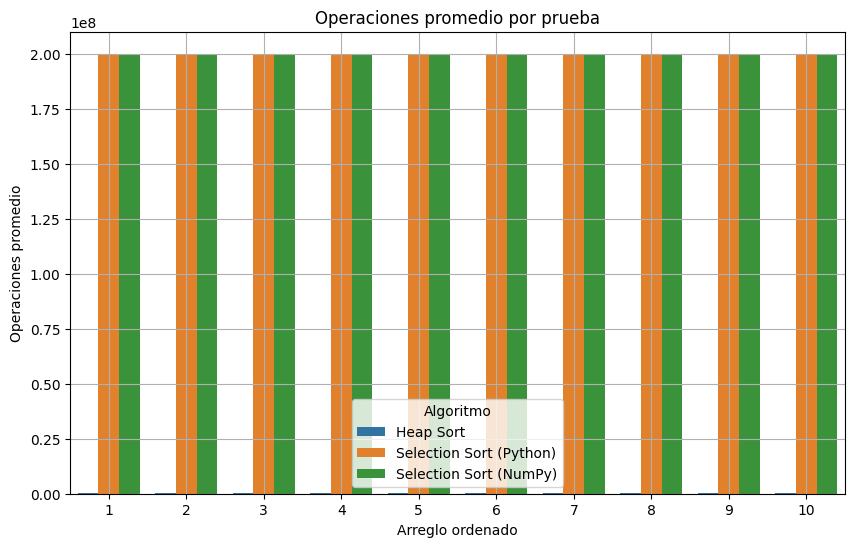

In [50]:
# Realizamos el grafico de operaciones promedio
plt.figure(figsize=(10, 6)) 
sns.barplot(data=df_combined20k, x='Arreglo_ordenado', y='operaciones', hue='algoritmo')
plt.title('Operaciones promedio por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Operaciones promedio')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.show()

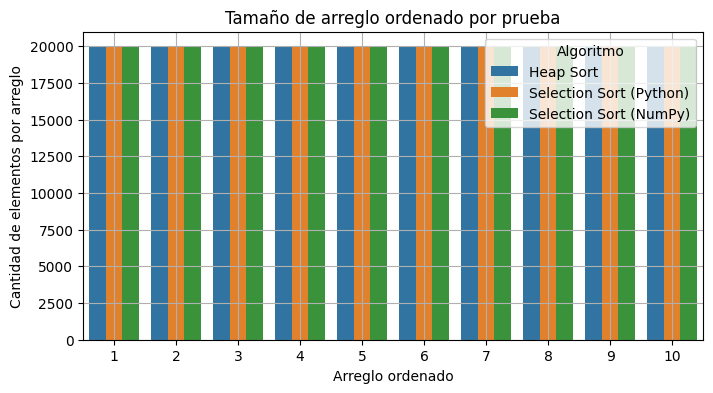

In [49]:
# Realizamos el grafico de tamaño de arreglo
plt.figure(figsize=(8, 4))
sns.barplot(data=df_combined20k, x='Arreglo_ordenado', y='tamano_arreglo', hue='algoritmo')
plt.title('Tamaño de arreglo ordenado por prueba')
plt.xlabel('Arreglo ordenado')
plt.ylabel('Cantidad de elementos por arreglo')
plt.grid(True)
plt.legend(title='Algoritmo')
plt.show()

<div align="center" style="font-size:84px;">
Resultados
</div>

In [53]:
print("HEAP SORT 200K")
display(df_heap_promd)
print("HEAP SORT 20K")
display(df_heap_20k_promd)

HEAP SORT 200K


,Arreglo_ordenado,algoritmo,tamano_arreglo,tiempo_segundos,operaciones
0,1,Heap Sort,200000.0,2.434292,3150210.0
1,2,Heap Sort,200000.0,2.460441,3150179.0
2,3,Heap Sort,200000.0,2.463945,3149708.0
3,4,Heap Sort,200000.0,2.462486,3149717.0
4,5,Heap Sort,200000.0,2.447785,3150146.0
5,6,Heap Sort,200000.0,2.443604,3149773.0
6,7,Heap Sort,200000.0,2.447190,3150177.0
7,8,Heap Sort,200000.0,2.444804,3149225.0
8,9,Heap Sort,200000.0,2.426918,3149996.0
9,10,Heap Sort,200000.0,2.449238,3149708.0


HEAP SORT 20K


,Arreglo_ordenado,algoritmo,tamano_arreglo,tiempo_segundos,operaciones
0,1,Heap Sort,20000.0,0.193733,248325.0
1,2,Heap Sort,20000.0,0.183004,248231.0
2,3,Heap Sort,20000.0,0.174452,248318.0
3,4,Heap Sort,20000.0,0.175488,248405.0
4,5,Heap Sort,20000.0,0.184526,248581.0
5,6,Heap Sort,20000.0,0.195905,248282.0
6,7,Heap Sort,20000.0,0.182390,248331.0
7,8,Heap Sort,20000.0,0.185840,248415.0
8,9,Heap Sort,20000.0,0.180735,248326.0
9,10,Heap Sort,20000.0,0.182856,248443.0


Como es observable el heap sort es muy eficiente siendo capaz de manejar 200k datos y ordenarlos en tan solo en un maximo de 2.46seg mientras que con 20k datos requiere milisegundos, esto demuestra que hacer uso de este método permite un desempeño bastante aceptable.

In [54]:
print("SELECTION SORT python")
display(df_sel_normal_promd)
print("SELECTION SORT numpy")
display(df_sel_numpy_promd)

SELECTION SORT python


,Arreglo_ordenado,algoritmo,tamano_arreglo,tiempo_segundos,operaciones,intercambios
0,1,Selection Sort (Python),20000.0,41.574368,199990000.0,19996.0
1,2,Selection Sort (Python),20000.0,42.943878,199990000.0,19991.0
2,3,Selection Sort (Python),20000.0,41.864373,199990000.0,19986.0
3,4,Selection Sort (Python),20000.0,41.837152,199990000.0,19992.0
4,5,Selection Sort (Python),20000.0,42.768259,199990000.0,19990.0
5,6,Selection Sort (Python),20000.0,42.898098,199990000.0,19989.0
6,7,Selection Sort (Python),20000.0,42.540295,199990000.0,19990.0
7,8,Selection Sort (Python),20000.0,43.515432,199990000.0,19985.0
8,9,Selection Sort (Python),20000.0,43.398789,199990000.0,19989.0
9,10,Selection Sort (Python),20000.0,42.941972,199990000.0,19989.0


SELECTION SORT numpy


,Arreglo_ordenado,algoritmo,tamano_arreglo,tiempo_segundos,operaciones,intercambios
0,1,Selection Sort (NumPy),20000.0,29.874774,199990000.0,19996.0
1,2,Selection Sort (NumPy),20000.0,30.080633,199990000.0,19991.0
2,3,Selection Sort (NumPy),20000.0,30.252682,199990000.0,19986.0
3,4,Selection Sort (NumPy),20000.0,30.443952,199990000.0,19992.0
4,5,Selection Sort (NumPy),20000.0,30.325897,199990000.0,19990.0
5,6,Selection Sort (NumPy),20000.0,30.303286,199990000.0,19989.0
6,7,Selection Sort (NumPy),20000.0,30.450068,199990000.0,19990.0
7,8,Selection Sort (NumPy),20000.0,30.428489,199990000.0,19985.0
8,9,Selection Sort (NumPy),20000.0,30.418883,199990000.0,19989.0
9,10,Selection Sort (NumPy),20000.0,30.013813,199990000.0,19989.0


Por otro lado el algoritmo de selección es tan ineficiente que es incapaz de manejar más de 20k porque sino el timepo de procesamiento y la cantidad de operaciones se dispara facilmiento, puesto que aún usando numpy el menor tiempo que obtuvo de 3 iteraciones con 10 arreglos de 20k fue de 29.87seg usando numpy, mientras que en python vannilla solo logro 40seg.

Esto anudado con los gráficos que podemos observar abajo, podemos ver con pruebas contundentes que el Heap sort es por mucho más eficiente que el Selection sort, ya que no solo permite manejar más datos sino que el tiempo de operación disminuye en un ¡95%!

<div align="center">
Heap Sort(200k) vs Selection sort (20k)
<img width="800px" height="400px" src="./graficos/tiempo_prom_200k-20k.png">
<img width="800px" height="400px" src="./graficos/tamaño_prom_200k-20k.png">
<img width="800px" height="400px" src="./graficos/operaciones_prom_200k-20k.png">

Heap Sort(20k) vs Selection sort (20k)
<img width="800px" height="400px" src="./graficos/tiempo_prom_200k-20k.png">
<img width="800px" height="400px" src="./graficos/tamaño_prom_20k-20k.png">
<img width="800px" height="400px" src="./graficos/operaciones_prom_20k-20k.png">
</div>

<div align="center" style="font-size:84px;">
Conclusión
</div>
Tras realizar un análisis exhaustivo del desempeño de los algoritmos **Heap Sort** y **Selection Sort**, se pueden extraer conclusiones claras y fundamentadas sobre su eficiencia computacional, especialmente en el contexto de ordenamiento de arreglos de gran tamaño (20,000 a 200,000 elementos).

## Rendimiento en Tiempo de Ejecución

El **Heap Sort** demostró ser considerablemente más rápido que el **Selection Sort**:

- En promedio, **Heap Sort** tardó **menos de 3 segundos** en ordenar arreglos de **200,000 elementos**.
- Por otro lado, el **Selection Sort** (tanto en su versión nativa como con NumPy) tomó **entre 30 y 50 segundos** en ordenar arreglos de **20,000 elementos**, lo cual proyectado a tamaños mayores sería extremadamente ineficiente.

Esto refleja la diferencia teórica entre sus complejidades temporales:
- **Heap Sort**: *O(n log n)*
- **Selection Sort**: *O(n²)*

La diferencia se hace aún más evidente conforme aumenta el tamaño del arreglo, mostrando que **Heap Sort es mucho más escalable**.

---

## Número de Operaciones Realizadas

En cuanto al número de operaciones:

- El **Heap Sort** realizó alrededor de **3,150,000 llamadas a `heapify`** por prueba, lo cual es relativamente bajo comparado con el número de comparaciones del **Selection Sort**.

- El **Selection Sort** efectuó siempre **199,990,000 comparaciones** por ejecución, sin importar el tamaño del arreglo ni la prueba específica. Esto confirma su comportamiento cuadrático predecible pero poco eficiente.

Aunque **Selection Sort realiza pocos intercambios** (alrededor de 20,000), esto no compensa el elevado número de comparaciones que debe hacer, lo cual afecta drásticamente su rendimiento global.

---

## Optimización con NumPy

Se implementó una versión del **Selection Sort utilizando `numpy`** con el objetivo de mejorar su rendimiento frente a la implementación nativa en Python. Los resultados mostraron una ligera mejora en tiempo de ejecución, pero **no fue suficiente para acercarse al rendimiento del Heap Sort**.

| Algoritmo | Tiempo promedio (segundos) | Operaciones promedio |
|----------|-----------------------------|----------------------|
| Heap Sort (200k elem.) | ~2.5 s | ~3.15 millones |
| Selection Sort (20k elem.) | ~40 s | ~199.99 millones |
| Selection Sort + NumPy (20k elem.) | ~30 s | ~199.99 millones |

> Aunque **NumPy optimiza ciertas operaciones**, el **coste algorítmico sigue siendo O(n²)**, lo cual limita su utilidad en conjuntos grandes.

---

## Escalabilidad y Uso Práctico

### Heap Sort
- **Ideal para arreglos grandes**
- Complejidad óptima para aplicaciones reales
- Muy estable en tiempos de ejecución entre pruebas
- Requiere menos operaciones globales

### Selection Sort
- **No recomendado para conjuntos grandes**
- Complejidad cuadrática lo hace ineficiente
- Puede usarse únicamente para propósitos educativos o datasets muy pequeños
- Aunque simple de implementar, su uso práctico es limitado

---

## Conclusiones Generales

1. **Heap Sort destaca como un algoritmo altamente eficiente**, especialmente útil en escenarios donde se manejan **grandes volúmenes de datos**.
2. **Selection Sort**, aunque fácil de entender e implementar, **no es viable para arreglos grandes** debido a su alto costo temporal.

3. **Usar NumPy ayuda a reducir el tiempo de ejecución de Selection Sort**, pero no cambia su complejidad subyacente.

4. La estructura orientada a objetos utilizada permitió **facilitar la comparación entre algoritmos**, ya que compartían una interfaz común para cargar datos y guardar resultados.

5. Este experimento reafirma los conceptos teóricos sobre complejidad algorítmica: **la elección del algoritmo tiene un impacto enorme en el desempeño real**, incluso dentro del mismo lenguaje de programación (Python).

---

Para aplicaciones reales donde se requiera **ordenar grandes cantidades de datos de manera eficiente**, se recomienda el uso de **Heap Sort**, **Merge Sort** o **Quick Sort**, todos con una complejidad de **O(n log n)**. El **Selection Sort**, aunque útil para enseñanza, debe evitarse en entornos productivos o con restricciones de tiempo.